C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\dlgus\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

(4512, 28, 1)
(721, 28, 1)
주간test개수:  76
일별test개수:  721
일별test개수2:  762
[INFO] training model...
Train on 3609 samples, validate on 903 samples
Epoch 1/100
3609/3609 [==============================] - 32s 9ms/step - loss: 0.0053 - val_loss: 0.0058
Epoch 2/100
3609/3609 [==============================] - 30s 8ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 3/100
3609/3609 [==============================] - 30s 8ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 4/100
3609/3609 [==============================] - 31s 9ms/step - loss: 0.0036 - val_loss: 0.0037
Epoch 5/100
3609/3609 [==============================] - 31s 9ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 6/100
3609/3609 [==============================] - 29s 8ms/step - loss: 0.0038 - val_loss: 0.0042
Epoch 7/100
3609/3609 [==============================] - 29s 8ms/step - loss: 0.0034 - val_loss: 0.0028
Epoch 8/100
3609/3609 [==============================] - 29s 8ms/step - loss: 0.0034 - val_loss: 0.0029
Epoch 9/100
3609/3609 [=

3609/3609 [==============================] - 30s 8ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 78/100
3609/3609 [==============================] - 30s 8ms/step - loss: 0.0023 - val_loss: 0.0035
Epoch 79/100
3609/3609 [==============================] - 29s 8ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 80/100
3609/3609 [==============================] - 29s 8ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 81/100
3609/3609 [==============================] - 30s 8ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 82/100
3609/3609 [==============================] - 31s 9ms/step - loss: 0.0023 - val_loss: 0.0033
Epoch 83/100
3609/3609 [==============================] - 30s 8ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 84/100
3609/3609 [==============================] - 31s 9ms/step - loss: 0.0023 - val_loss: 0.0034
Epoch 85/100
3609/3609 [==============================] - 30s 8ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 86/100
3609/3609 [==============================] - 29s 8ms/st

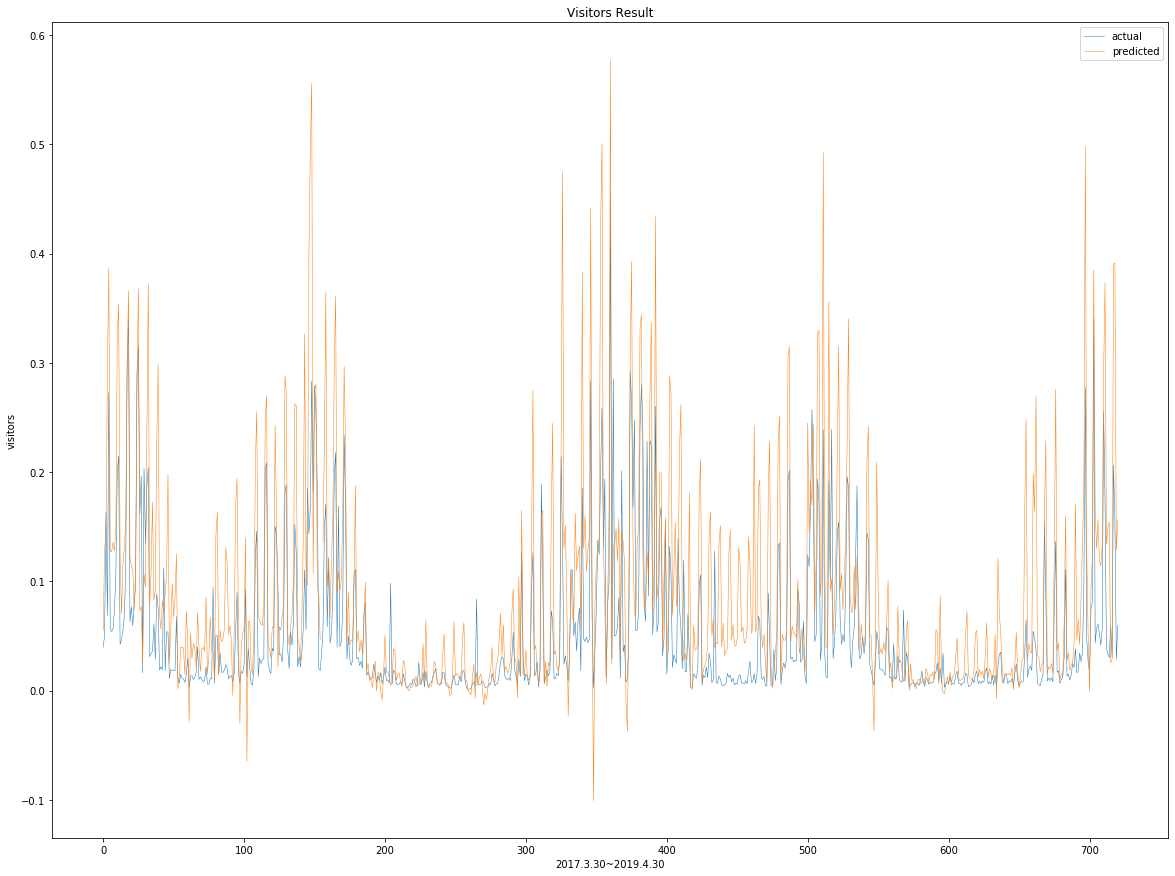

In [30]:
import numpy as np
from keras import layers, models
from keras.utils import np_utils
from keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping
 

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()
 
        # 첫 번째 은닉층
        self.add(layers.Dense(Nh_l[0], activation='relu',input_shape=(Nin,), name='Hidden-1'))
        # Dropout 확률을 정한다.
        # Dropout : 랜덤으로 몇개의 노드를 비활성화 한다.(오버피팅 방지)
        self.add(layers.Dropout(Pd_l[0]))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))
        self.add(layers.Dense(Nh_l[2], activation='relu', name='Hidden-3'))
        self.add(layers.Dropout(Pd_l[2]))
        self.add(layers.Dense(Nout))

df = pd.read_csv('SeoulGrandPark.csv', engine = 'python')    
df["날짜"] = df["년도"].map(str) + '-' +df["월"].map(str) + '-' + df["일"].map(str)#날짜 column생성

df = df.set_index('날짜') 

split_date_last = '2016-12-17'
split_date_start = '2017-3-30'

#*******************************************************************************************************
train = df.loc[:split_date_last]
test = df.loc[split_date_start:]

train['일계'] = train['일계'].str.replace(',', '')
test['일계'] = test['일계'].str.replace(',', '')

train['일계'] = train['일계'].astype('float')
test['일계'] = test['일계'].astype('float')
#******************************위는 DNN용 특성 데이터셋, 아래는 LSTM용 시계열 데이터*********************
trainLSTM = df.loc[:split_date_last, ['일계']]
testLSTM = df.loc[split_date_start:, ['일계']]
# print(train.head())

trainLSTM['일계'] = trainLSTM['일계'].str.replace(',', '')
testLSTM['일계'] = testLSTM['일계'].str.replace(',', '')

trainLSTM['일계'] = trainLSTM['일계'].astype('float')
testLSTM['일계'] = testLSTM['일계'].astype('float')
#***********************************이어서 시계열 데이터 처리********************************************
#주단위 데이터로 변환.
train2LSTM = trainLSTM.iloc[0:0]
traintmp2 = trainLSTM.copy()
for i in range(int(len(trainLSTM)/7)):
    traintmp = trainLSTM['일계'][i*7:i*7+7]
    traintmp2['일계'][i*7+6] = traintmp.mean(axis = 0)
    train2LSTM = pd.concat([train2LSTM, traintmp2[i*7+6:i*7+7]], axis=0)
    
test2LSTM = testLSTM.iloc[0:0]
testtmp2 = testLSTM.copy()
for i in range(int(len(testLSTM)/7)):
    testtmp = testLSTM['일계'][i*7:i*7+7]
    testtmp2['일계'][i*7+6] = testtmp.mean(axis = 0)
    test2LSTM = pd.concat([test2LSTM, testtmp2[i*7+6:i*7+7]], axis=0)
#**********************************이어서 시계열 데이터 처리*******************************
weekfrom = 2
weekto = 33
week = weekto - weekfrom

dayfrom = 14
dayto = 42
day = dayto - dayfrom

sc = MinMaxScaler()

train_sc2LSTM = sc.fit_transform(train2LSTM)
test_sc2LSTM = sc.transform(test2LSTM)

train_scLSTM = sc.fit_transform(trainLSTM)
test_scLSTM = sc.transform(testLSTM)

# print(train_sc)

train_sc_df2LSTM = pd.DataFrame(train_sc2LSTM, columns=['Scaled'], index=train2LSTM.index)
test_sc_df2LSTM = pd.DataFrame(test_sc2LSTM, columns=['Scaled'], index=test2LSTM.index)
# print(train_sc_df.head())

train_sc_dfLSTM = pd.DataFrame(train_scLSTM, columns=['Scaled'], index=trainLSTM.index)
test_sc_dfLSTM = pd.DataFrame(test_scLSTM, columns=['Scaled'], index=testLSTM.index)
# print(train_sc_df.head())

for s in range(weekfrom, weekto):
    train_sc_df2LSTM['shift_{}'.format(s)] = train_sc_df2LSTM['Scaled'].shift(s)
    test_sc_df2LSTM['shift_{}'.format(s)] = test_sc_df2LSTM['Scaled'].shift(s)
    
for s in range(dayfrom, dayto):
    train_sc_dfLSTM['shift_{}'.format(s)] = train_sc_dfLSTM['Scaled'].shift(s)
    test_sc_dfLSTM['shift_{}'.format(s)] = test_sc_dfLSTM['Scaled'].shift(s)
    
X_train2LSTM = train_sc_df2LSTM.dropna().drop('Scaled', axis=1)
y_train2LSTM = train_sc_df2LSTM.dropna()[['Scaled']]

X_trainLSTM = train_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_trainLSTM = train_sc_dfLSTM.dropna()[['Scaled']]

X_test2LSTM = test_sc_df2LSTM.dropna().drop('Scaled', axis=1)
y_test2LSTM = test_sc_df2LSTM.dropna()[['Scaled']]

X_testLSTM = test_sc_dfLSTM.dropna().drop('Scaled', axis=1)
y_testLSTM = test_sc_dfLSTM.dropna()[['Scaled']]

X_train2LSTM = X_train2LSTM.values
X_test2LSTM= X_test2LSTM.values

y_train2LSTM = y_train2LSTM.values
y_test2LSTM = y_test2LSTM.values

X_train_t2LSTM = X_train2LSTM.reshape(X_train2LSTM.shape[0], week, 1)
X_test_t2LSTM = X_test2LSTM.reshape(X_test2LSTM.shape[0], week, 1)

X_trainLSTM = X_trainLSTM.values
X_testLSTM = X_testLSTM.values

y_trainLSTM = y_trainLSTM.values
y_testLSTM = y_testLSTM.values

X_train_tLSTM = X_trainLSTM.reshape(X_trainLSTM.shape[0], day, 1)
X_test_tLSTM = X_testLSTM.reshape(X_testLSTM.shape[0], day, 1)

print(X_train_tLSTM.shape)
print(X_test_tLSTM.shape)

print('주간test개수: ', len(y_test2LSTM))
print('일별test개수: ', len(y_testLSTM))

#*************************************LSTM모델링**************************************************
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K
from keras.callbacks import EarlyStopping 
from keras import optimizers
from keras.models import Model
from keras.layers import concatenate
K.clear_session()
model2 = Sequential() # Sequeatial Model 
model2.add(LSTM(60, input_shape=(week, 1), return_sequences = True)) # (timestep, feature)
model2.add(LSTM(60))
model2.add(Dense(1)) # output = 1 
# adam2 = optimizers.Adam(lr=0.0004)
# model2.compile(loss='mean_squared_error', optimizer=adam2) 

# early_stop2 = EarlyStopping(monitor='loss', patience=30, verbose=1)

# model2.fit(X_train_t2LSTM, y_train2LSTM, epochs=2,
#           batch_size=10, verbose=1, callbacks=[early_stop2])
#***************************위는 주간, 아래는 일간**********************************************************
model = Sequential() # Sequeatial Model 
model.add(LSTM(56, input_shape=(day, 1), return_sequences = True)) # (timestep, feature)
model.add(LSTM(56))
model.add(Dense(10)) # output = 1 
# adam = optimizers.Adam(lr=0.001)
# model.compile(loss='mean_squared_error', optimizer=adam)

# early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1)

# model.fit(X_train_tLSTM, y_trainLSTM, epochs=2,
#           batch_size=30, verbose=1, validation_split = 0.2, callbacks=[early_stop])
#*************************************************************************************************************

# y_pred2 = model2.predict(X_test_t2LSTM)
# y_pred2train = model2.predict(X_train_t2LSTM)
# plt.plot(y_train2LSTM)
# plt.plot(y_pred2train)
# plt.show()

# y_pred = model.predict(X_test_tLSTM)
# y_predtrain = model.predict(X_train_tLSTM)
# plt.plot(y_testLSTM)
# plt.plot(y_pred)
# plt.show()
#********************************이어서 DNN****************************************************************
#LSTM으로인해 나온 feature를 train data에 넣어준다.
#근데 모델을 학습시킬 때는 
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)
    
X_train = train_df.drop(['일계', '년도', '일'], axis=1)
y_train = train_df[['일계']]
X_test = test_df.drop(['일계', '년도', '일'], axis=1)
y_test = test_df[['일계']]
    
#one-hot-encoding
X_train = pd.get_dummies(X_train, columns=['요일', '월'])
X_test = pd.get_dummies(X_test, columns=['요일', '월'])

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)
y_train_sc = sc.fit_transform(y_train)
y_test_sc = sc.fit_transform(y_test)
#*************************************************************************************************************

print('일별test개수2: ', len(y_test_sc))

Nh_l = [2000, 1000, 1000]
Pd_l = [0, 0, 0, 0]
number_of_class = 10
Nout = number_of_class

early_stop = EarlyStopping(monitor='val_loss', patience=30, verbose=1)

model3 = DNN(X_train_sc.shape[1], Nh_l, Pd_l, Nout)
#********************************************************************************************************
combinedInput = concatenate([model.output, model3.output])

x = Dense(100)(combinedInput)
x = Dense(1)(x)

model4 = Model(inputs=[model.input, model3.input], outputs=x)

opt = Adam(lr=0.001)
model4.compile(loss="mean_squared_error", optimizer=opt)

X_train_sc_dropped = X_train_sc[dayto-1:]

print("[INFO] training model...")
model4.fit([X_train_tLSTM, X_train_sc_dropped], y_trainLSTM, validation_split = 0.2, epochs=100, batch_size=10)

X_test_sc_dropped = X_test_sc[dayto-1:]

plt.figure(figsize=(20,15))
plt.rcParams['lines.linewidth'] = 0.5
plt.title('Visitors Result')
plt.xlabel('2017.3.30~2019.4.30')
plt.ylabel('visitors')
plt.plot(y_testLSTM, label='actual')
Y_pred = model4.predict([X_test_tLSTM, X_test_sc_dropped])
plt.plot(Y_pred, label='predicted')
plt.legend()
plt.show()
